In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, MeanShift, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import OPTICS

In [3]:
dataset = pd.read_csv('heart_disease_patients.csv')

print(dataset.head())

   id  age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0   1   63    1   1       145   233    1        2      150      0      2.3   
1   2   67    1   4       160   286    0        2      108      1      1.5   
2   3   67    1   4       120   229    0        2      129      1      2.6   
3   4   37    1   3       130   250    0        0      187      0      3.5   
4   5   41    0   2       130   204    0        2      172      0      1.4   

   slope  
0      3  
1      2  
2      2  
3      3  
4      1  


In [4]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)

In [5]:
# کاهش ابعاد داده‌ها با استفاده از PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


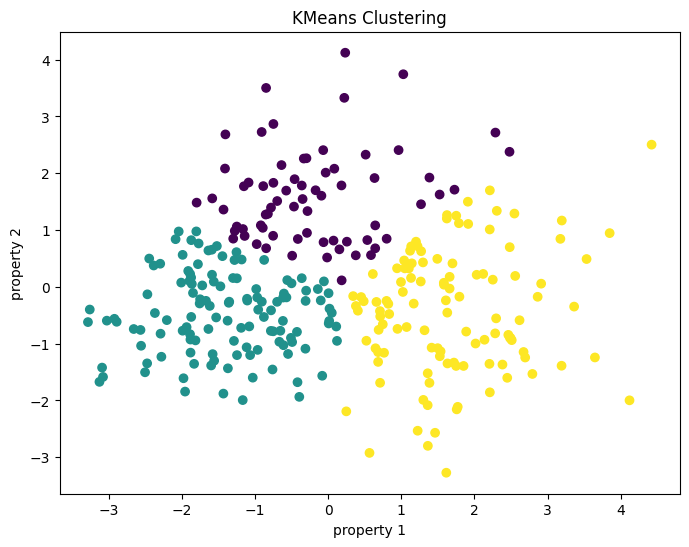

KMeans Silhouette Score: 0.3976440257751947


In [6]:
# اعمال الگوریتم KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(pca_data)
dataset['KMeans_Cluster'] = kmeans.labels_

# نمایش نتایج خوشه‌بندی KMeans
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=dataset['KMeans_Cluster'])
plt.xlabel('property 1')
plt.ylabel('property 2')
plt.title('KMeans Clustering')
plt.show()

# محاسبه و نمایش شاخص سیلوئت برای KMeans
kmeans_silhouette = silhouette_score(pca_data, dataset['KMeans_Cluster'])
print(f"KMeans Silhouette Score: {kmeans_silhouette}")

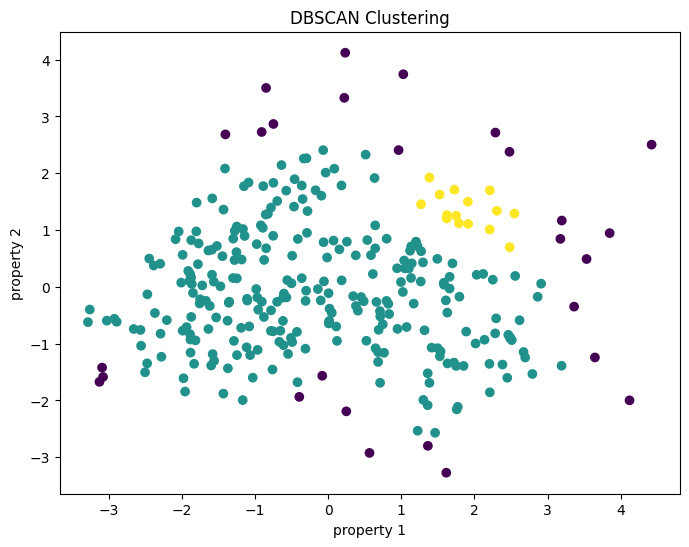

DBSCAN Silhouette Score: 0.1523962371807687


In [7]:
# اعمال الگوریتم DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(pca_data)
dataset['DBSCAN_Cluster'] = dbscan.labels_

# نمایش نتایج خوشه‌بندی DBSCAN
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=dataset['DBSCAN_Cluster'])
plt.xlabel('property 1')
plt.ylabel('property 2')
plt.title('DBSCAN Clustering')
plt.show()

# محاسبه و نمایش شاخص سیلوئت برای DBSCAN
dbscan_silhouette = silhouette_score(pca_data, dataset['DBSCAN_Cluster'])
print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")

Number of unique labels: 43


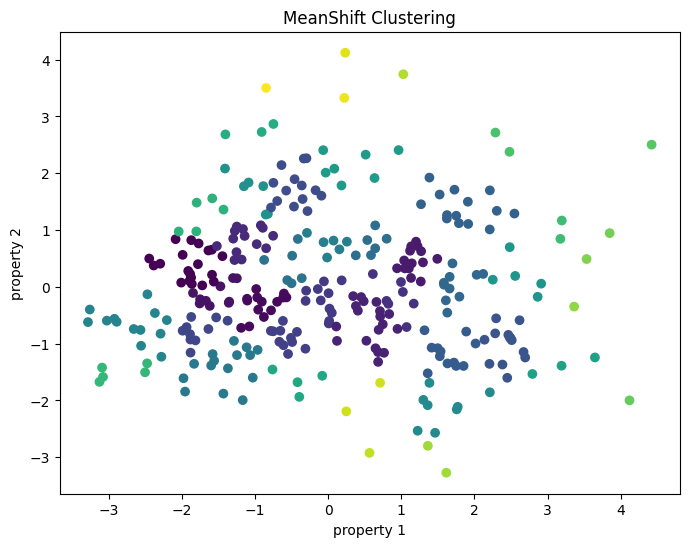

MeanShift Silhouette Score: 0.3011997619013365


In [10]:
# اعمال الگوریتم MeanShift
mean_shift = MeanShift(bandwidth=0.5) # Add bandwidth parameter
mean_shift.fit(pca_data)
dataset['MeanShift_Cluster'] = mean_shift.labels_

# Check the number of unique labels
print("Number of unique labels:", len(np.unique(dataset['MeanShift_Cluster'])))

# نمایش نتایج خوشه‌بندی MeanShift
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=dataset['MeanShift_Cluster'])
plt.xlabel('property 1')
plt.ylabel('property 2')
plt.title('MeanShift Clustering')
plt.show()

# Only calculate silhouette score if there are multiple clusters
if len(np.unique(dataset['MeanShift_Cluster'])) > 1:
    # محاسبه و نمایش شاخص سیلوئت برای MeanShift
    mean_shift_silhouette = silhouette_score(pca_data, dataset['MeanShift_Cluster'])
    print(f"MeanShift Silhouette Score: {mean_shift_silhouette}")
else:
    print("Cannot calculate Silhouette Score: Only one cluster found.")

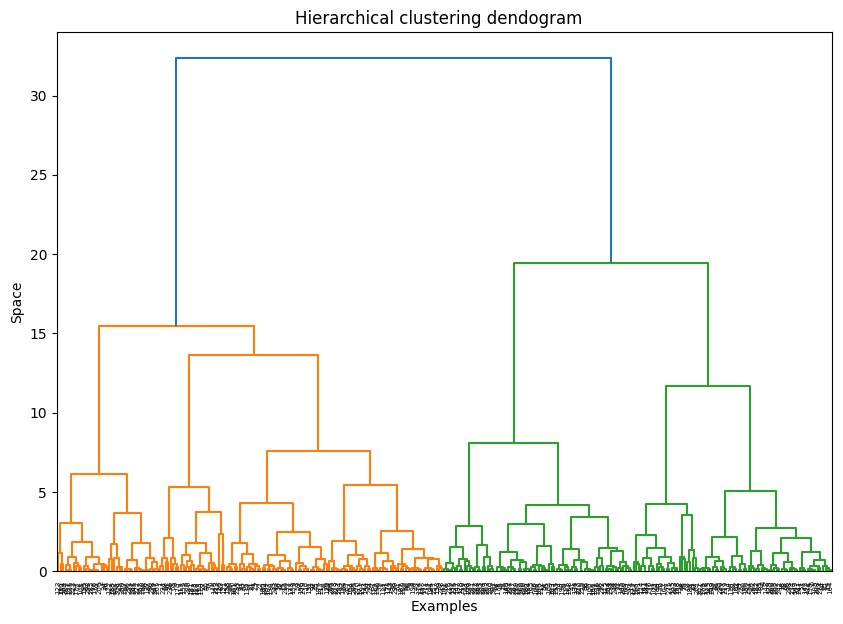

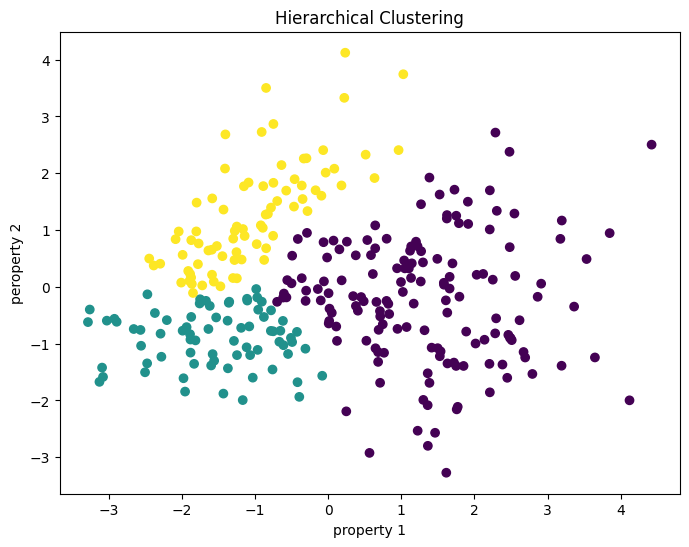

Hierarchical Silhouette Score: 0.344558719077509


In [12]:
# اعمال الگوریتم خوشه‌بندی سلسله‌مراتبی
Z = linkage(pca_data, method='ward')
dataset['Hierarchical_Cluster'] = fcluster(Z, t=3, criterion='maxclust')

plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical clustering dendogram  ')
plt.xlabel('Examples')
plt.ylabel('Space')
plt.show()

# نمایش نتایج خوشه‌بندی سلسله‌مراتبی
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=dataset['Hierarchical_Cluster'])
plt.xlabel('property 1')
plt.ylabel('peroperty 2')
plt.title('Hierarchical Clustering')
plt.show()

# محاسبه و نمایش شاخص سیلوئت برای خوشه‌بندی سلسله‌مراتبی
hierarchical_silhouette = silhouette_score(pca_data, dataset['Hierarchical_Cluster'])
print(f"Hierarchical Silhouette Score: {hierarchical_silhouette}")

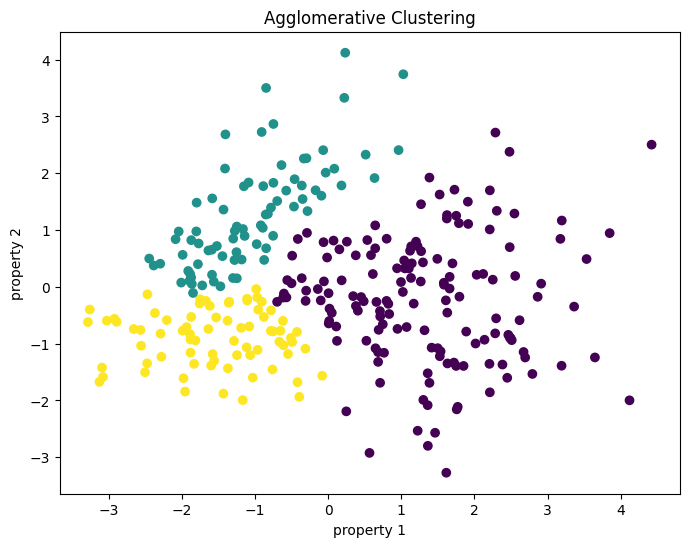

Agglomerative Clustering Silhouette Score: 0.344558719077509


In [13]:
# اعمال الگوریتم Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3)
agglo.fit(pca_data)
dataset['Agglomerative_Cluster'] = agglo.labels_

# نمایش نتایج خوشه‌بندی Agglomerative Clustering
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=dataset['Agglomerative_Cluster'])
plt.xlabel('property 1')
plt.ylabel('property 2')
plt.title('Agglomerative Clustering')
plt.show()

# محاسبه و نمایش شاخص سیلوئت برای Agglomerative Clustering
agglo_silhouette = silhouette_score(pca_data, dataset['Agglomerative_Cluster'])
print(f"Agglomerative Clustering Silhouette Score: {agglo_silhouette}")

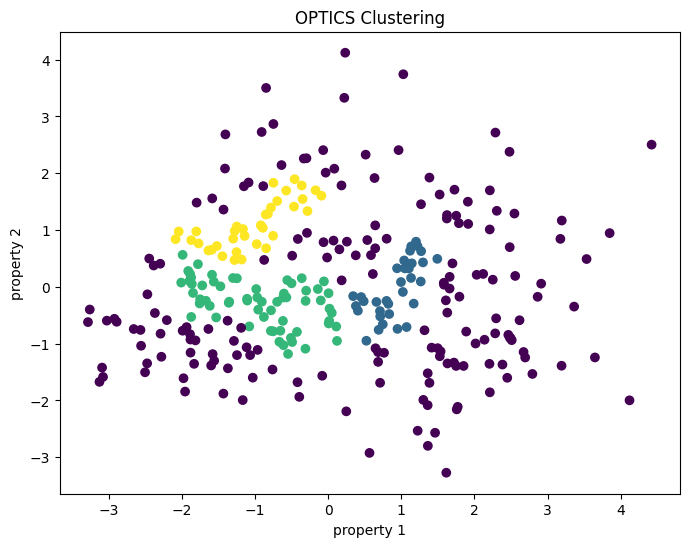

OPTICS Silhouette Score: -0.07759971274995388


In [15]:
# اعمال الگوریتم OPTICS
optics = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.1)
optics.fit(pca_data)
dataset['OPTICS_Cluster'] = optics.labels_

# نمایش نتایج خوشه‌بندی OPTICS
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=dataset['OPTICS_Cluster'])
plt.xlabel('property 1')
plt.ylabel('property 2')
plt.title('OPTICS Clustering')
plt.show()

# محاسبه و نمایش شاخص سیلوئت برای OPTICS
optics_silhouette = silhouette_score(pca_data, dataset['OPTICS_Cluster'])
print(f"OPTICS Silhouette Score: {optics_silhouette}")